 # IMDB 
IMDB.sqlite' database contains all details of movies and has three tables with name IMDB, genre and earning.

## Q-1.
Find the count of each genre present in IMDB movie dataset?
- Print the Genre and number of movies present in that genre.

In [1]:
import pandas as pd
import sqlite3
db = sqlite3.connect("IMDB.sqlite")
data=pd.read_sql("select distinct(genre.genre),count(*) from genre join IMDB on genre.Movie_id = IMDB.Movie_id group by genre ",db)
a = data['genre']
b = data['count(*)']
for i in range(1,len(a)):
    print(a[i],b[i])


Action 33
Adventure 43
Animation 13
Biography 21
Comedy 31
Crime 11
Drama 77
Family 3
Fantasy 7
History 6
Horror 2
Music 3
Musical 1
Mystery 7
Romance 13
Sci-Fi 18
Sport 3
Thriller 14
War 2
Western 2


## Q-2.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database.
- Print the rating of that movie.

In [2]:
db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select max(Domestic+Worldwide),rating from earning join IMDB on earning.Movie_id = IMDB.Movie_id",db)
a=df['Rating']
print(*a)

8.1


## Q-3.
Find the most voted movie in IMDB Movie Database.
- Print the movie name and the rating of that movie.

In [3]:
db = sqlite3.connect("IMDB.sqlite")
cur= db.cursor()
cur.execute("select Title,Rating from IMDB where TotalVotes = 1609713")
a =cur.fetchall()
for i in a:
    print(*i)

Inception (2010) 8.8


## Q-4.
Find the Movie with Longest-Running Time from IMDB Movie database.
- Print the name of movie and running time as integer value.

Note: Don't print 'min' in running time.

In [4]:
db = sqlite3.connect("IMDB.sqlite")
cur = db.cursor()
data = pd.read_sql_query('select * from IMDB',db)
a =data['Runtime']
b=[]
c=[]
for i in range(len(a)):
    b.append(a[i].split(" "))
    #print(b[i][0])
    if b[i][0]=='':
        c.append(0)
    else:
        c.append(int(b[i][0]))
data['Rtime']=c
data.to_sql("IMDB",db,if_exists = "replace")
cur.execute("select Title,max(Rtime) from IMDB")
a =cur.fetchall()
for i in a:
    print(*i)

The Wolf of Wall Street (2013) 180


## Q-5.
Find the movie which has maximum net profit in IMDB Movie Database.
- Print the movie name. Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [5]:

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select max((Domestic+Worldwide)-Budget),Title from earning join IMDB on earning.Movie_id = IMDB.Movie_id",db)
a=df['Title']
print(*a)

Star Wars: The Force Awakens (2015)


## Q-6.
Find the least budgeted movie in IMDB Movie Database.
- If there is more than one least budgeted movies then print the movie which has maximum net profit.

Note: Net Profit= Total Earning(Domestic+WorldWide earning) - budget

In [20]:

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select min(Budget),Title from earning join IMDB on earning.Movie_id = IMDB.Movie_id",db)
a=df['Title']
print(*a)

Detachment (2011)


## Q-7.
Find the highest-grossing movie (i.e domestic earning + worldwide earning) in IMDB database year wise.
- Print the Year and name of the movie which was the highest grosser in that year. Note:Print the year in ascending order.

In [7]:

db = sqlite3.connect("IMDB.sqlite")
df = pd.read_sql_query("select * from IMDB ",db)
a=df['Title']
b=[]
c=[]
for i in range(len(a)):
    
    if "\xa0" in a[i]:
        b.append(a[i].strip(")").split("\xa0("))
    else:
        b.append(a[i].strip(")").split("("))
    c.append(int(b[i][1]))
df["Year"] = c
df.to_sql("IMDB",db,if_exists = "replace")
df=pd.read_sql_query('select Year,Title,max(Domestic+Worldwide) from IMDB join earning on earning.Movie_id = IMDB.Movie_id group by Year order by Year ',db)
a = df['Year']
b = df['Title']
for i in range(len(a)):
    print(a[i],b[i])

2010 Toy Story 3 (2010)
2011 Rise of the Planet of the Apes (2011)
2012 The Avengers (2012)
2013 The Hunger Games: Catching Fire (2013)
2014 Guardians of the Galaxy (2014)
2015 Star Wars: The Force Awakens (2015)
2016 Rogue One (2016)


## Q-8.
Find out the percentage of the budget for each genre in IMDB Movie Dataset?Plot the pie chart.
- Print the genre and percentage of movies budget present in that genre with 2 decimal place after rounding off.

Note:

- Movies has multiple genres, so calculate the percentage for each genre.
- Replace empty budget column to zero.

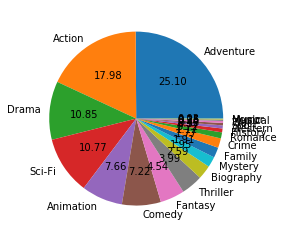

Adventure 25.10
Action 17.98
Drama 10.85
Sci-Fi 10.77
Animation 7.66
Comedy 7.22
Fantasy 4.54
Thriller 3.99
Biography 2.59
Mystery 1.95
Family 1.91
Crime 1.77
Romance 1.12
History 0.72
Western 0.57
Sport 0.46
War 0.36
Musical 0.25
Music 0.15
Horror 0.03


In [13]:

df = pd.read_sql_query('select a.Movie_id, Genre, Title, Budget from imdb a inner join genre b on a.Movie_id = b.Movie_id',db)
df[['Budget']] = df[['Budget']].apply(pd.to_numeric)
df.Budget.fillna(0,inplace = True)
# df.head()

d = {} # genre : budget
for _,row in df.iterrows():
    genre = row['genre']
    budget = row['Budget']
    d[genre] = d.get(genre,0)+budget
    
d.pop('',None)
d = sorted(d.items(), key=lambda x: x[1], reverse=True) # sort by descending order of value
# d

import matplotlib.pyplot as plt
%matplotlib inline
counts = [t[1] for t in d]
genres = [t[0] for t in d]

plt.pie(counts,labels = genres,autopct = '%.2f')
plt.show()

for i in range(len(d)):
    p = round((counts[i]/sum(counts))*100,2)
    print(genres[i],'{:.2f}'.format(p)) #to ensure trailing zeroes are printed

## Q-9.
Find out the percentage of the total earning for each genre in IMDB Movie Dataset

- Print the genre and percentage of movies total earning present in that genre with 2 decimal place after rounding off.

Note: Movies have multiple genres, so calculate the percentage for each genre.Total Earning=Domestic earning + WorldWide earning.

In [14]:

import pandas as pd
import sqlite3
import numpy as np
db=sqlite3.connect('IMDB.sqlite')
imdb=pd.read_sql_query("Select * from IMDB",db)
earning=pd.read_sql_query("Select * from earning",db)
genre=pd.read_sql_query("Select * from genre",db)
movie_id=genre['Movie_id'].value_counts().index
genre_array=[]
for i in range(len(movie_id)):
    single_genre=[]
    single=genre[genre['Movie_id']==movie_id[i]]['genre'].values
    single_genre.append(movie_id[i])
    for i in single:
        single_genre.append(i)
    genre_array.append(single_genre)
new_genre=pd.DataFrame(genre_array,columns=['Movie_id','genre_1','genre_2','genre_3'])
result = pd.merge(imdb,new_genre,on='Movie_id')
imdb_earning_genre=pd.merge(result,earning,on='Movie_id')
imdb_earning_genre['Domestic'].replace('',0,inplace=True)
imdb_earning_genre['Worldwide'].replace('',0,inplace=True)
imdb_earning_genre['Total Earning']=imdb_earning_genre['Domestic']+imdb_earning_genre['Worldwide']

genre_1_name=imdb_earning_genre.groupby('genre_1')['Total Earning'].sum().index
genre_1_amount=imdb_earning_genre.groupby('genre_1')['Total Earning'].sum().values
genre_2_name=imdb_earning_genre.groupby('genre_2')['Total Earning'].sum().index
genre_2_amount=imdb_earning_genre.groupby('genre_2')['Total Earning'].sum().values
genre_3_name=imdb_earning_genre.groupby('genre_3')['Total Earning'].sum().index
genre_3_amount=imdb_earning_genre.groupby('genre_3')['Total Earning'].sum().values
genre_name={}
for i in range(len(genre_1_name)):
    genre_name[genre_1_name[i]]=genre_1_amount[i]
for i in range(len(genre_2_name)):
    if genre_2_name[i] in genre_name:
        genre_name[genre_2_name[i]]=genre_name.get(genre_2_name[i])+genre_2_amount[i]
    else:
        genre_name[genre_2_name[i]]=genre_2_amount[i]
for i in range(len(genre_3_name)):
    if genre_3_name[i] in genre_name:
        genre_name[genre_3_name[i]]=genre_name.get(genre_3_name[i])+genre_3_amount[i]
    else:
        genre_name[genre_3_name[i]]=genre_3_amount[i]
del genre_name['']
genre_names=np.array(list(genre_name.keys()))
genre_amount=np.array(list(genre_name.values()))
perAmount=np.true_divide(genre_amount, genre_amount.sum())*100
for i in range(len(genre_names)):
    print(genre_names[i],format(perAmount[i],'.2f'))

Action 17.91
Adventure 23.57
Animation 6.77
Biography 3.42
Comedy 7.69
Crime 1.55
Drama 11.96
Mystery 2.01
Family 1.05
Fantasy 5.15
History 1.04
Horror 0.01
Music 0.43
Musical 0.38
Romance 1.45
Sci-Fi 9.95
Sport 0.32
Thriller 4.42
War 0.25
Western 0.65


## Q-10.
Find the movie which has genre of 'Sci-Fi' and 'Mystery' and movie rating is greater or equal to 8 from IMDB Movie Database.
- Print the movie name.

In [22]:
df = pd.read_sql_query('select a.Movie_id, Title, Genre, Rating from imdb a inner join genre b on a.Movie_id = b.Movie_id where Rating>=8 and (Genre="Sci-Fi" or Genre = "Mystery")',db)
d = {} # name: [genres]
for _,row in df.iterrows():
    name = row['Title']
    genre = row['genre']
    if name not in d:
        d[name] = set()
    d[name].add(genre)
    
for k,v in d.items(): #only those movies that have multiple genres are to be printed
    if len(v)==2:
        print(k)
print("\n","Must Watch! :)")

Arrival (2016)

 Must Watch! :)
